In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
pd.options.display.max_columns = None
display(df[:5])

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [3]:
num_cols = df._get_numeric_data().columns

In [4]:
df.shape

(58592, 44)

### NULL VALUE DETECTION

In [5]:
df.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [7]:
df.describe(include='all')

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
count,58592,58592.000000,58592.000000,58592.000000,58592,58592.000000,58592.000000,58592,58592,58592,58592,58592,58592,58592.000000,58592,58592,58592,58592,58592,58592,58592.000000,58592.000000,58592,58592.000000,58592,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592.000000,58592.000000
unique,58592,NaN,NaN,NaN,22,NaN,NaN,6,11,3,9,9,11,NaN,2,2,2,2,2,2,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN
top,ID00001,NaN,NaN,NaN,C8,NaN,NaN,B2,M1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,NaN,No,Yes,No,Yes,No,Drum,NaN,NaN,Manual,NaN,Power,NaN,NaN,NaN,NaN,NaN,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,NaN,NaN
freq,1,NaN,NaN,NaN,13654,NaN,NaN,18314,14948,20532,17796,17796,14948,NaN,40191,35526,44574,56219,35704,44574,NaN,NaN,38181,NaN,33502,NaN,NaN,NaN,NaN,NaN,33928,41634,41634,38077,32177,42435,42435,57383,34291,36309,42435,58229,NaN,NaN
mean,NaN,0.611246,0.069424,0.469420,NaN,18826.858667,1.763722,NaN,NaN,NaN,NaN,NaN,NaN,3.137066,NaN,NaN,NaN,NaN,NaN,NaN,1162.355851,3.626963,NaN,5.245443,NaN,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.759950,0.063968
std,NaN,0.414156,0.056721,0.122886,NaN,17660.174792,1.136988,NaN,NaN,NaN,NaN,NaN,NaN,1.832641,NaN,NaN,NaN,NaN,NaN,NaN,266.304786,0.483616,NaN,0.430353,NaN,0.228061,311.457119,112.089135,79.62227,212.423085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.389576,0.244698
min,NaN,0.002735,0.000000,0.288462,NaN,290.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,796.000000,3.000000,NaN,5.000000,NaN,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,0.210250,0.020000,0.365385,NaN,6112.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,796.000000,3.000000,NaN,5.000000,NaN,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,0.573792,0.060000,0.451923,NaN,8794.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,1197.000000,4.000000,NaN,5.000000,NaN,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000
75%,NaN,1.039104,0.110000,0.548077,NaN,27003.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,1493.000000,4.000000,NaN,5.000000,NaN,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000


In [8]:
#df.drop('policy_id',axis=1,inplace=True)

### Feature Engineering and Categorical Feature Encoding

In [9]:
te=ce.TargetEncoder()
le=LabelEncoder()
ohe=OneHotEncoder()

C:\Users\Lms\anaconda3\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\Lms\anaconda3\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [10]:
target=['area_cluster','model','engine_type']
onehot=['segment','fuel_type','rear_brakes_type','transmission_type','steering_type']
label=['is_esc','is_adjustable_steering','is_tpms','is_parking_sensors','is_parking_camera','is_front_fog_lights','is_rear_window_wiper','is_rear_window_washer','is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert']

In [11]:
q=te.fit_transform(df['area_cluster'],df['age_of_car'])
df['area_cluster']=q 
w=te.fit_transform(df['model'],df['area_cluster'])
df['model']=w
e=te.fit_transform(df['engine_type'],df['area_cluster'])
df['engine_type']=e

In [12]:
q=te.fit_transform(test['area_cluster'],test['age_of_car'])
test['area_cluster']=q 
w=te.fit_transform(test['model'],test['area_cluster'])
test['model']=w
e=te.fit_transform(test['engine_type'],test['area_cluster'])
test['engine_type']=e

In [13]:
df['transmission_type']=df.transmission_type.map({'Manual':'Mn','Automatic':'At'})

In [14]:
test['transmission_type']=test.transmission_type.map({'Manual':'Mn','Automatic':'At'})

In [15]:
for j in onehot:
    o=pd.get_dummies(df[j])
    df=df.merge(o,left_index=True,right_index=True)

In [16]:
for j in onehot:
    o=pd.get_dummies(test[j])
    test=test.merge(o,left_index=True,right_index=True)

In [17]:
df.drop(['segment','fuel_type','rear_brakes_type','transmission_type','steering_type'],axis=1,inplace=True)

In [18]:
test.drop(['segment','fuel_type','rear_brakes_type','transmission_type','steering_type'],axis=1,inplace=True)

In [19]:
for k in label:
    df[k]=le.fit_transform(df[k])

In [20]:
for k in label:
    test[k]=le.fit_transform(test[k])

In [21]:
df['max_torque']=df.max_torque.map({'200Nm@1750rpm':8,'250Nm@2750rpm':7,'200Nm@3000rpm':6,'170Nm@4000rpm':5,'85Nm@3000rpm':4,'113Nm@4400rpm':3,'82.1Nm@3400rpm':2,'91Nm@4250rpm':1,'60Nm@3500rpm':0})

In [22]:
test['max_torque']=test.max_torque.map({'200Nm@1750rpm':8,'250Nm@2750rpm':7,'200Nm@3000rpm':6,'170Nm@4000rpm':5,'85Nm@3000rpm':4,'113Nm@4400rpm':3,'82.1Nm@3400rpm':2,'91Nm@4250rpm':1,'60Nm@3500rpm':0})

In [23]:
df['max_power']=df.max_power.map({'113.45bhp@4000rpm':8,'97.89bhp@3600rpm':7,'88.77bhp@4000rpm':6,'118.36bhp@5500rpm':5,'88.50bhp@6000rpm':4
,'67.06bhp@5500rpm':3,'55.92bhp@5300rpm':2,'61.68bhp@6000rpm':1,'40.36bhp@6000rpm':0})

In [24]:
test['max_power']=test.max_power.map({'113.45bhp@4000rpm':8,'97.89bhp@3600rpm':7,'88.77bhp@4000rpm':6,'118.36bhp@5500rpm':5,'88.50bhp@6000rpm':4
,'67.06bhp@5500rpm':3,'55.92bhp@5300rpm':2,'61.68bhp@6000rpm':1,'40.36bhp@6000rpm':0})

In [25]:
df['volume']=df['length']*df['width']*df['height']

In [26]:
test['volume']=test['length']*test['width']*test['height']

### Outlier Detection

In [27]:
"""
num_cols=['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
    'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating']
       """

"\nnum_cols=['policy_tenure', 'age_of_car', 'age_of_policyholder',\n       'population_density', 'make', 'airbags', 'displacement', 'cylinder',\n    'turning_radius', 'length', 'width', 'height',\n       'gross_weight', 'ncap_rating']\n       "

In [28]:
#for col in num_cols:
  #plt.figure(figsize=(5,3))
  #sns.boxplot(df[col])
  #plt.xlabel(f'{col}')
  #plt.show()

In [29]:
"""
def outlier(data,feature):
  q1=data[feature].quantile(0.25)
  q3=data[feature].quantile(0.75)
  iqr=q3-q1
  ul=q3+1.5*iqr
  ll=q1-1.5*iqr
  return ul,ll
"""

'\ndef outlier(data,feature):\n  q1=data[feature].quantile(0.25)\n  q3=data[feature].quantile(0.75)\n  iqr=q3-q1\n  ul=q3+1.5*iqr\n  ll=q1-1.5*iqr\n  return ul,ll\n'

In [30]:
#for i in num_cols:
  #ul,ll=outlier(df,i)
  #df=df[(df[i]<ul) & (df[i]>ll)]

### Splitting the Data

In [31]:
X=df.drop('is_claim',axis=1)
y=df['is_claim'].values

In [32]:
p_id=test['policy_id']
X.drop('policy_id',axis=1,inplace=True)

### 12 most important features selected using Random Forest

In [33]:

#12 features
#rf: 0.9478700590736082
#xt: 0.9567131078109264

X=X[['age_of_car',
 'policy_tenure',
 'age_of_policyholder',
 'area_cluster',
 'displacement',
 'height',
 'engine_type',
 'length',
 'width',
 'model',
 'max_power',
 'max_torque']]


In [34]:
X_test=test[['age_of_car',
 'policy_tenure',
 'age_of_policyholder',
 'area_cluster',
 'displacement',
 'height',
 'engine_type',
 'length',
 'width',
 'model',
 'max_power',
 'max_torque'
 ]]

### Handling Imbalanced Data using SMOTE

In [35]:
sm=SMOTE()
X_sm,y_sm=sm.fit_resample(X,y)

### Standardizing the Data

In [36]:
scaler=StandardScaler()
X_sm=scaler.fit_transform(X_sm)
X_test=scaler.fit_transform(X_test)

### Model Creation

#### Random Forest Model with no hyperparameters

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
np.mean(cross_val_score(rf,X_sm,y_sm,cv=5,scoring='f1'))

0.9453092607623518

#### Extra Trees with no hyperparameter

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
et=ExtraTreesClassifier()
np.mean(cross_val_score(et,X_sm,y_sm,cv=5,scoring='f1'))

0.9506623546420393

### Feature Importance using Random Forest

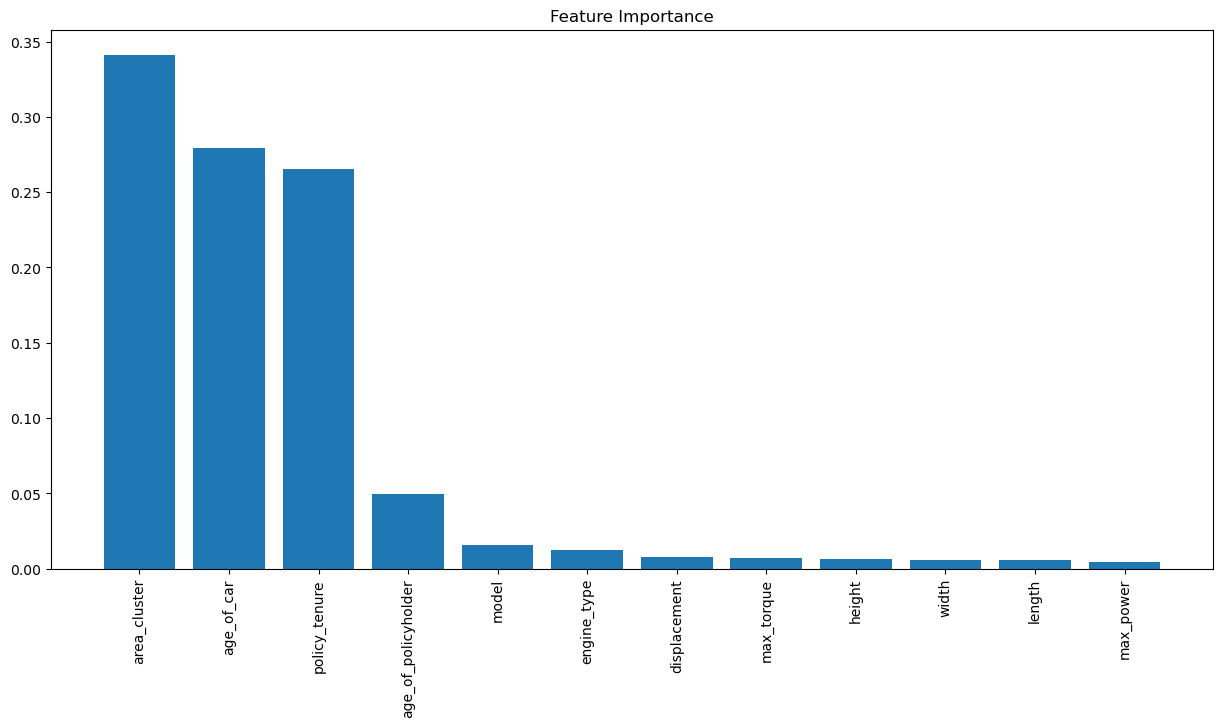

In [39]:
clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)
clf.fit(X_sm, y_sm)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_sm.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_sm.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [40]:
imps = pd.DataFrame(clf.feature_importances_, X.columns)
imps=imps.reset_index()
imps=imps.sort_values(by=[0],ascending=False)
a=imps['index']
b=a[:13]
c=b.tolist()
print(c)

['area_cluster', 'age_of_car', 'policy_tenure', 'age_of_policyholder', 'model', 'engine_type', 'displacement', 'max_torque', 'height', 'width', 'length', 'max_power']


### Hyperparameter Tuning using GridSearchCV

In [41]:
"""
params = {
          'n_estimators' : [400,500],
          'max_depth' : [50,60],
          'criterion' : ['gini', 'entropy'],
          'max_features' : [5,8]
         }
         """

"\nparams = {\n          'n_estimators' : [400,500],\n          'max_depth' : [50,60],\n          'criterion' : ['gini', 'entropy'],\n          'max_features' : [5,8]\n         }\n         "

In [42]:

"""from sklearn.model_selection import GridSearchCV

tuning_function = GridSearchCV(estimator = ExtraTreesClassifier(), 
                               param_grid = params,
                               scoring = 'f1',
                               cv = 3,
                               n_jobs=-1
                               )"""

"from sklearn.model_selection import GridSearchCV\n\ntuning_function = GridSearchCV(estimator = ExtraTreesClassifier(), \n                               param_grid = params,\n                               scoring = 'f1',\n                               cv = 3,\n                               n_jobs=-1\n                               )"

In [43]:
"""
tuning_function.fit(X_sm, y_sm)

parameters = tuning_function.best_params_
score = tuning_function.best_score_
print(parameters)
print(score) 
"""

'\ntuning_function.fit(X_sm, y_sm)\n\nparameters = tuning_function.best_params_\nscore = tuning_function.best_score_\nprint(parameters)\nprint(score) \n'

### best final hyperparameters
##### {'criterion': 'gini', 'max_depth': 50, 'max_features': 8, 'n_estimators': 400}

### Best final hyperparameters for Random Forst
##### {'criterion': 'entropy', 'max_depth': 60, 'max_features': 8, 'n_estimators': 400}


### RF with best hyperparameters

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy',max_depth=60,max_features=8,n_estimators=400)
np.mean(cross_val_score(rf,X_sm,y_sm,cv=5,scoring='f1'))

0.9508342333473794

### XT with best hyperparameters

In [45]:
clf=ExtraTreesClassifier(criterion='gini',max_depth=50,max_features=8,n_estimators=400)
np.mean(cross_val_score(clf,X_sm,y_sm,cv=5,scoring='f1'))

0.9559220612646169

### Final Model

#### ExtraTreesClassifier with hyperparameters below
#### {'criterion': 'gini', 'max_depth': 50, 'max_features': 8, 'n_estimators': 400}

In [46]:
X_test.shape

(39063, 12)

In [47]:
final=ExtraTreesClassifier(criterion='gini',max_depth=50,max_features=8,n_estimators=400)
final.fit(X_sm,y_sm)
y_pred=final.predict(X_test)

In [48]:
X_sm.shape

(109688, 12)

In [49]:
f_df=pd.DataFrame(y_pred,p_id).reset_index()

In [50]:
f_df.rename(columns={0:'is_claim'}, inplace=True)

In [51]:
f_df

,policy_id,is_claim
0,ID58593,1
1,ID58594,1
2,ID58595,1
3,ID58596,1
4,ID58597,1
...,...,...
39058,ID97651,1
39059,ID97652,1
39060,ID97653,0
39061,ID97654,1


In [52]:
f_df.to_csv('submission.csv',index=False)

In [53]:
a=pd.read_csv('submission.csv')

In [54]:
a

,policy_id,is_claim
0,ID58593,1
1,ID58594,1
2,ID58595,1
3,ID58596,1
4,ID58597,1
...,...,...
39058,ID97651,1
39059,ID97652,1
39060,ID97653,0
39061,ID97654,1
